In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV,ElasticNetCV
from pyentrp import entropy as pyent
import EntropyHub as EH
import neurokit2 as nk
import random
import sampen
import requests
import io
import apache_log_parser
from pprint import pprint
import os
from sklearn import preprocessing
from typing import List
import itertools

In [7]:
from datetime import datetime


def log2csv(prefix: str):
    log_line_data = []
    with open(f"{os.getcwd()}/{prefix}.log", mode='r', encoding="utf8", errors='ignore') as f1:
        log_line_data = np.array([line for line in f1.readlines()])
    replaced = pd.DataFrame([{"date": datetime.strptime(line.split()[3]+" "+line.split()[4],  "[%d/%b/%Y:%H:%M:%S +0000]"), "count": 1} for line in log_line_data])
    replaced.groupby(pd.Grouper(key="date", freq="S")).sum().reset_index().to_csv(f"{prefix}.csv")

In [8]:
log2csv("wc_day37_1")

In [9]:
log2csv("wc_day38_1")
log2csv("wc_day38_2")
log2csv("wc_day39_1")
log2csv("wc_day39_2")
log2csv("wc_day40_1")
log2csv("wc_day40_2")
log2csv("wc_day41_1")
log2csv("wc_day41_2")

In [11]:
df_wc_day37_1 = pd.read_csv(f"wc_day37_1.csv")
df_wc_day38_1 = pd.read_csv(f"wc_day38_1.csv")
df_wc_day38_2 = pd.read_csv(f"wc_day38_2.csv")
df_wc_day39_1 = pd.read_csv(f"wc_day39_1.csv")
df_wc_day39_2 = pd.read_csv(f"wc_day39_2.csv")
df_wc_day40_1 = pd.read_csv(f"wc_day40_1.csv")
df_wc_day40_2 = pd.read_csv(f"wc_day40_2.csv")
df_wc_day41_1 = pd.read_csv(f"wc_day41_1.csv")
df_wc_day41_2 = pd.read_csv(f"wc_day41_2.csv")

In [12]:
df = pd.concat([
    df_wc_day37_1,
    df_wc_day38_1,
    df_wc_day38_2,
    df_wc_day39_1,
    df_wc_day39_2,
    df_wc_day40_1,
    df_wc_day40_2,
    df_wc_day41_1,
    df_wc_day41_2
    ])

In [18]:
df['date'] = pd.to_datetime(df['date'])

In [27]:
df_group_by = df.groupby(pd.Grouper(key="date", freq="H")).sum().reset_index()

In [30]:
df_group_by

,date,Unnamed: 0,count
0,1998-05-31 22:00:00,6474601,143429
1,1998-05-31 23:00:00,19434600,132025
2,1998-06-01 00:00:00,32394600,138813
3,1998-06-01 01:00:00,45354600,137930
4,1998-06-01 02:00:00,58314600,157811
...,...,...,...
116,1998-06-05 18:00:00,257974008,388191
117,1998-06-05 19:00:00,6849000,380351
118,1998-06-05 20:00:00,19809000,373371
119,1998-06-05 21:00:00,32769000,328183


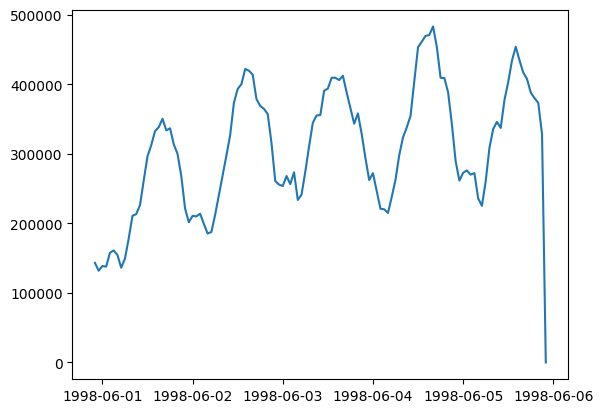

In [28]:
plt.plot(df_group_by["date"], df_group_by["count"])